In [1]:
# Importacion de librerias

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import math
#from tensorflow.python.ops import math_ops
#import datetime
#import random
#from keras.callbacks import EarlyStopping

In [2]:
# Se cargan los vectores de entrada de Test X1_test y X2_test, 

# Se cargan los vectores de salida de Test y_test_cos y y_test_sin,  

base_dir = "C:/TESIS/data_preprocessing/SNR_03_azimuth_ranged_Kfold_1/"  
y_pred_cos = np.load(base_dir + 'model_Azimuth_1y_pred_cos.npy')
y_pred_sin = np.load(base_dir + 'model_Azimuth_1y_pred_sin.npy')
y_test_cos = np.load(base_dir + 'y_test_cos.npy')
y_test_sin = np.load(base_dir + 'y_test_sin.npy')


print('y_pred_cos',y_pred_cos.shape)
print('y_pred_sin',y_pred_cos.shape)
print('y_test_cos',y_test_cos.shape)
print('y_test_sin',y_test_sin.shape)

y_pred_cos (1682, 1)
y_pred_sin (1682, 1)
y_test_cos (1682,)
y_test_sin (1682,)


In [3]:
# Se importa el conjunto de datos  de Test

events_container_path= "C:\\TESIS\\data_preprocessing\\SNR_03_azimuth_ranged_Kfold_1\\"
dataset_test= pd.read_pickle(events_container_path + "dataset_test.pkl")
dataset_test

,Origin_Time,Latitude,Longitude,Depth,RMS,ML,Mc,MW,P_time,S_time,...,SNR_2_Z_S,SNR_2_N_S,SNR_2_E_S,SNR_2_Z_P,SNR_2_N_P,SNR_2_E_P,Azimuth_radianes,Is_Valid,Distance_norm,Azimuth
0,2016-01-11T23:11:50.300000Z,19.927,-75.456,0.0,0.5,0.1,1.7,None,2016-01-11T23:11:55.310000Z,2016-01-11T23:12:00.130000Z,...,20.574681,21.529936,22.708077,10.518312,4.76797,3.120287,1.867502,True,0.238182,107.0
1,2017-10-28T04:30:23.800000Z,19.897,-75.957,18.5,0.2,0.1,1.5,None,2017-10-28T04:30:29.190000Z,2017-10-28T04:30:33.340000Z,...,18.111326,17.945597,21.022966,15.652623,4.429527,8.820252,4.328417,True,0.266364,248.0
2,2017-03-30T22:22:56.500000Z,19.892,-76.011,2.1,0.5,0.9,1.7,1.5,2017-03-30T22:23:02.260000Z,2017-03-30T22:23:06.430000Z,...,21.175672,25.085863,24.695206,23.464687,16.424032,21.601553,4.380776,True,0.317273,251.0
3,2022-07-14T23:52:34.200000Z,19.799,-75.798,5.0,0.4,0.9,2.4,None,2022-07-14T23:52:38.370000Z,2022-07-14T23:52:41.620000Z,...,31.661725,33.279206,23.221859,15.316448,13.822199,14.221784,3.595378,True,0.220000,206.0
4,2020-07-02T19:01:55.300000Z,19.605,-75.874,24.2,0.1,0.4,1.8,None,2020-07-02T19:02:03.180000Z,2020-07-02T19:02:09.180000Z,...,14.143985,20.434165,8.239799,12.025562,18.654294,17.887542,3.543018,True,0.427273,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,2013-12-15T22:23:02.400000Z,19.955,-75.839,23.1,0.7,1.3,1.8,1.9,2013-12-15T22:23:06.620000Z,None,...,None,None,None,18.816574,13.077403,9.382533,4.415683,True,0.140909,253.0
1678,2018-03-05T07:51:19.400000Z,19.866,-75.500,32.3,0.3,1.1,2.1,None,2018-03-05T07:51:25.260000Z,2018-03-05T07:51:29.600000Z,...,30.768004,37.027276,44.718428,34.473273,30.903744,35.350707,2.181662,True,0.228182,125.0
1679,2021-06-08T16:21:51.900000Z,19.823,-76.021,2.2,0.2,0.6,2.0,None,2021-06-08T16:21:58.800000Z,2021-06-08T16:22:03.970000Z,...,11.445073,8.017099,17.552178,3.575652,-1.93444,0.628263,4.206243,True,0.354545,241.0
1680,2014-11-19T01:35:00.000000Z,19.918,-75.639,34.2,0.0,0.2,2.0,None,2014-11-19T01:35:05.200000Z,2014-11-19T01:35:09.170000Z,...,18.080358,18.522888,20.240543,10.159155,6.01571,6.062766,2.530727,True,0.095455,145.0


In [4]:
y_pred_cos_1 = np.squeeze(y_pred_cos)
y_pred_sin_1 = np.squeeze(y_pred_sin)

In [5]:
print('y_pred_cos_1',y_pred_cos_1.shape)
print('y_pred_sin_1',y_pred_cos_1.shape)

y_pred_cos_1 (1682,)
y_pred_sin_1 (1682,)


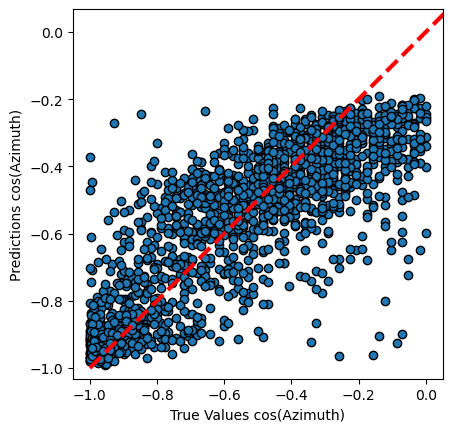

In [6]:
plt.scatter(y_test_cos,y_pred_cos_1, edgecolors='black')
plt.xlabel('True Values cos(Azimuth)')
plt.ylabel('Predictions cos(Azimuth)')
plt.axis('equal')
plt.axis('square')
ident = [-1.0, 1.0]
plt.plot(ident,ident,color="red", linestyle="--",linewidth=3)


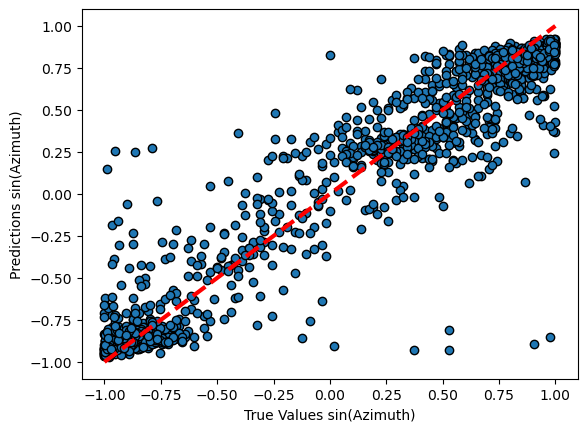

In [7]:
plt.scatter(y_test_sin,y_pred_sin_1, edgecolors='black')
plt.xlabel('True Values sin(Azimuth)')
plt.ylabel('Predictions sin(Azimuth)')
#plt.axis('equal')
#plt.axis('square')
ident = [-1.0, 1.0]
plt.plot(ident,ident,color="red", linestyle="--",linewidth=3)

Text(0, 0.5, 'Sen(azimuth)')

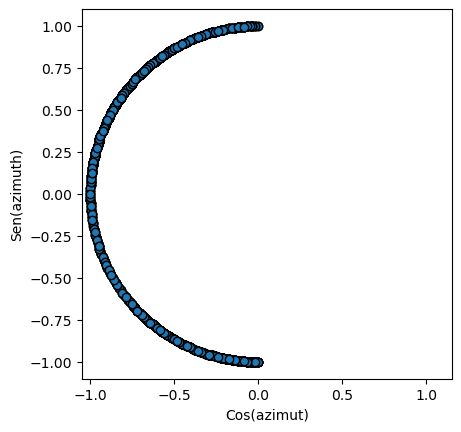

In [8]:
plt.scatter(y_test_cos,y_test_sin,  edgecolors='black' )
plt.axis('square')
plt.xlabel('Cos(azimut)')
plt.ylabel('Sen(azimuth)')

Text(0, 0.5, 'Sen(azimuth)')

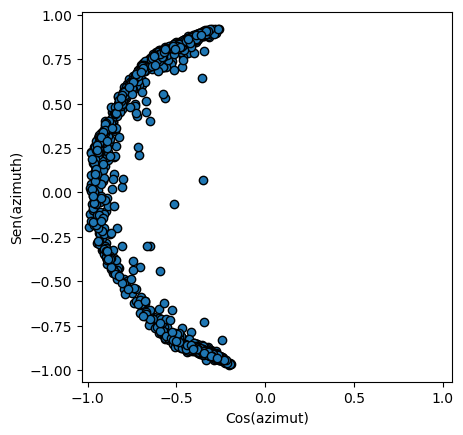

In [9]:
plt.scatter(y_pred_cos_1,y_pred_sin_1,  edgecolors='black' )
plt.axis('square')
plt.xlabel('Cos(azimut)')
plt.ylabel('Sen(azimuth)')

Text(0, 0.5, 'Sen(azimuth)')

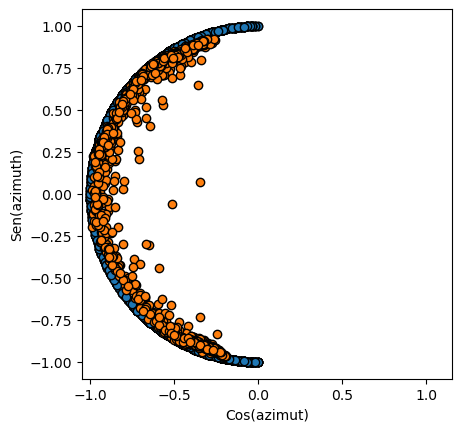

In [10]:
plt.scatter(y_test_cos,y_test_sin,  edgecolors='black' )
plt.scatter(y_pred_cos_1,y_pred_sin_1,  edgecolors='black' )
plt.axis('square')
plt.xlabel('Cos(azimut)')
plt.ylabel('Sen(azimuth)')

In [11]:
samples_number=len(y_pred_sin_1)
y_pred_degree=np.empty(shape=[samples_number])

for n in range(samples_number): 
    angle_rad = math.atan2(y_pred_sin_1[n],y_pred_cos_1[n])
    angle_degree= math.degrees(angle_rad)
    if (angle_degree < 0) :
        angle_degree = 360- abs(angle_degree)
    y_pred_degree[n]=angle_degree
#y_pred_degree
    

In [12]:
y_pred_degree.shape

(1682,)

In [13]:
y_test_degree = dataset_test['Azimuth']


In [14]:
y_distance = dataset_test['Distance']

In [15]:
y_test_degree.shape

(1682,)

In [16]:
samples_number=len(y_test_degree)
y_residual=np.empty(shape=[samples_number])

for n in range(samples_number):
    angle_diff =y_pred_degree[n] - y_test_degree[n]
    #print('angle_diff:',angle_diff)
    correction = abs(180 - abs(angle_diff))
    #print('correction: ',correction)
    diff = 180 - correction
    #print(diff)
    if angle_diff >= 0 :
         y_residual[n]= diff 
    else:
         y_residual[n]= -diff         
    
y_residual.shape



    

(1682,)

In [18]:
# Calculo el R2 de la regresion 
SS_res =  np.sum(np.square( y_test_degree - y_pred_degree )) 
SS_tot = np.sum(np.square( y_test_degree - np.mean(y_test_degree) ) ) 
r2 =( 1 - SS_res/(SS_tot ) )
print('R2: ',r2)


R2:  0.924804415786


In [19]:
df = pd.DataFrame({'True Azimuth': y_test_degree, 'Predicted Azimuth': y_pred_degree, 'Error': y_residual})
pd.options.display.max_rows = None
df


,True Azimuth,Predicted Azimuth,Error
0,107.0,126.844847,19.844847
1,248.0,250.011005,2.011005
2,251.0,243.810968,-7.189032
3,206.0,228.239436,22.239436
4,203.0,200.382380,-2.617620
5,165.0,189.982474,24.982474
6,136.0,131.379715,-4.620285
7,261.0,253.734822,-7.265178
8,254.0,252.933586,-1.066414
9,255.0,249.827214,-5.172786


In [20]:
df_sorted = df.sort_values('Error')
df_sorted

,True Azimuth,Predicted Azimuth,Error
1500,252.0,160.272654,-91.727346
866,261.0,171.200192,-89.799808
1508,240.0,164.141078,-75.858922
691,232.0,163.298960,-68.701040
1223,255.0,190.728060,-64.271940
1542,180.0,119.568674,-60.431326
1650,250.0,189.735889,-60.264111
899,244.0,186.916494,-57.083506
933,230.0,182.702452,-47.297548
893,204.0,157.320952,-46.679048


In [44]:
df_sorted.loc[291]

True Azimuth          94.000000
Predicted Azimuth    157.777548
Error                 63.777548
Name: 291, dtype: float64

In [21]:
#Para mostrar en el mapa
dataset_for_mapping = pd.DataFrame({'True Azimuth': y_test_degree, 'Predicted Azimuth': y_pred_degree, 'Distance': y_distance, 'Error': y_residual})
pd.options.display.max_rows = None
dataset_for_mapping


,True Azimuth,Predicted Azimuth,Distance,Error
0,107.0,126.844847,26.20,19.844847
1,248.0,250.011005,29.30,2.011005
2,251.0,243.810968,34.90,-7.189032
3,206.0,228.239436,24.20,22.239436
4,203.0,200.382380,47.00,-2.617620
5,165.0,189.982474,16.40,24.982474
6,136.0,131.379715,44.50,-4.620285
7,261.0,253.734822,41.30,-7.265178
8,254.0,252.933586,42.70,-1.066414
9,255.0,249.827214,110.00,-5.172786


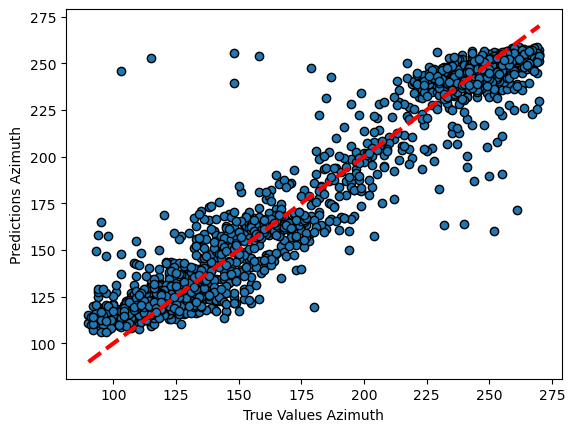

In [22]:
plt.scatter(y_test_degree,y_pred_degree, edgecolors='black')
plt.xlabel('True Values Azimuth')
plt.ylabel('Predictions Azimuth')
ident = [90.0, 270.0]
plt.plot(ident,ident,color="red", linestyle="--",linewidth=3)

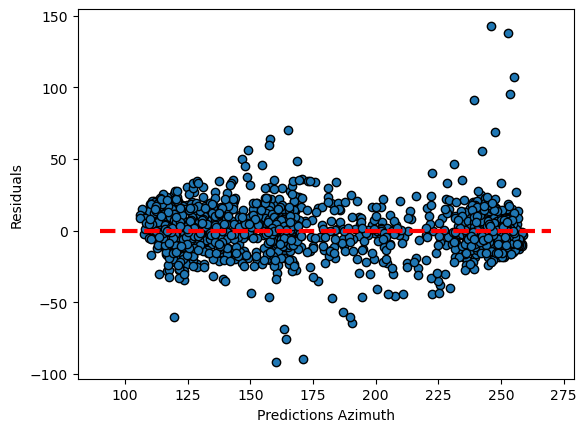

In [23]:
plt.scatter(y_pred_degree,y_residual, edgecolors='black')
plt.xlabel('Predictions Azimuth')
plt.ylabel('Residuals')
ident = [90,270]
ident1 =[0,0]
plt.plot(ident,ident1,color="red", linestyle="--",linewidth=3)

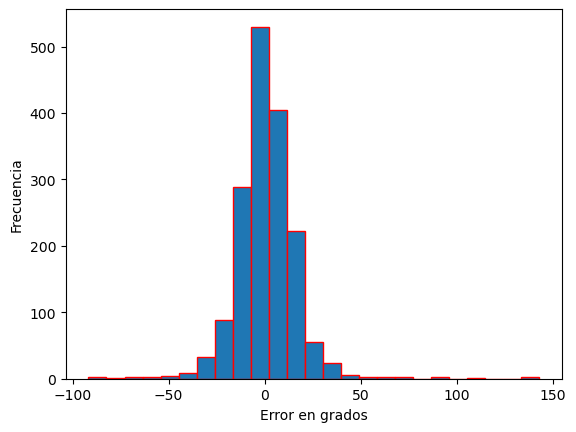

In [24]:
plt.hist(y_residual, edgecolor='red',bins = 25)
plt.xlabel("Error en grados")
_ = plt.ylabel("Frecuencia")

In [25]:
media = y_residual.mean()
print('Error Media :',media)

Error Media : 0.594298420982


In [26]:
mae = np.mean(np.absolute(y_residual))
print('Error MAE :',mae)

Error MAE : 10.735044248


In [27]:
varianza = y_residual.var()
print('Error Varianza :',varianza)

Error Varianza : 248.333030438


In [28]:
std = y_residual.std()
print('Error Desviacion Standar :',std)

Error Desviacion Standar : 15.7585859276


In [29]:
# Salvo los dataset de Mapping
container_path= "C:\\TESIS\\data_preprocessing\\SNR_03_azimuth_ranged_Kfold_1\\"
dataset_for_mapping.to_pickle(container_path +'dataset_for_mapping.pkl')
